In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#read the data
data = pd.read_csv('Bank.csv')
# deleting two last columns and deleting any duplicates if such exist
data = data.iloc[:,:-2]
data.drop_duplicates(subset=['CLIENTNUM'])
data.head(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,...,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,...,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,...,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,...,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144


In [273]:
# type of varibles
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
CLIENTNUM                   10127 non-null int64
Attrition_Flag              10127 non-null object
Customer_Age                10127 non-null int64
Gender                      10127 non-null object
Dependent_count             10127 non-null int64
Education_Level             10127 non-null object
Marital_Status              10127 non-null object
Income_Category             10127 non-null object
Card_Category               10127 non-null object
Months_on_book              10127 non-null int64
Total_Relationship_Count    10127 non-null int64
Months_Inactive_12_mon      10127 non-null int64
Contacts_Count_12_mon       10127 non-null int64
Credit_Limit                10127 non-null float64
Total_Revolving_Bal         10127 non-null int64
Avg_Open_To_Buy             10127 non-null float64
Total_Amt_Chng_Q4_Q1        10127 non-null float64
Total_Trans_Amt             10127 non-null int

In [274]:
#checking if there are any missing values
data.isna().any()

CLIENTNUM                   False
Attrition_Flag              False
Customer_Age                False
Gender                      False
Dependent_count             False
Education_Level             False
Marital_Status              False
Income_Category             False
Card_Category               False
Months_on_book              False
Total_Relationship_Count    False
Months_Inactive_12_mon      False
Contacts_Count_12_mon       False
Credit_Limit                False
Total_Revolving_Bal         False
Avg_Open_To_Buy             False
Total_Amt_Chng_Q4_Q1        False
Total_Trans_Amt             False
Total_Trans_Ct              False
Total_Ct_Chng_Q4_Q1         False
Avg_Utilization_Ratio       False
dtype: bool

In [275]:
#data descriptive statistics
data.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [276]:
# categorical variables 
categorical=data.select_dtypes(exclude=['int64','float64']).columns
print(categorical)

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')


In [277]:
#Attrition Flag
attr_flag = data["Attrition_Flag"].value_counts()
print(attr_flag)

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64


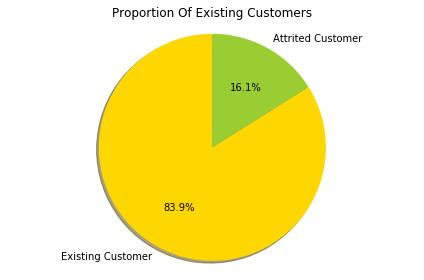

In [278]:
# pie chart for Attrition Flag
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','peru','plum']
fig, ax = plt.subplots()
ax.pie(attr_flag, labels=attr_flag.index, autopct='%1.1f%%', shadow=True, colors=colors, startangle=90)
plt.title('Proportion Of Existing Customers')
ax.axis('equal')
plt.tight_layout()
plt.show();

In [279]:
#Gender
gender = data["Gender"].value_counts()
print(gender)

F    5358
M    4769
Name: Gender, dtype: int64


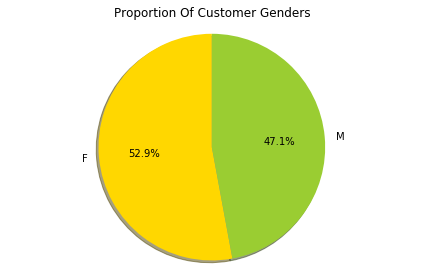

In [280]:
# Pie chart for Gender
fig1, ax1 = plt.subplots()
ax1.pie(gender, labels=gender.index, autopct='%1.1f%%', shadow=True, colors=colors, startangle=90)
plt.title('Proportion Of Customer Genders')
ax1.axis('equal')
plt.tight_layout()
plt.show();
#uniformly distributed

In [281]:
# Education Level
educ_lvl = data["Education_Level"].value_counts()
print(educ_lvl)

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64


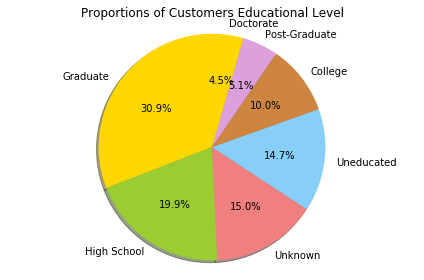

In [282]:
# Pie chart for education level
fig2, ax2 = plt.subplots()
ax2.pie(educ_lvl, labels=educ_lvl.index, colors = colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Proportions of Customers Educational Level')
ax2.axis('equal')
plt.tight_layout()
plt.show();

In [283]:
#Marital Status
mar_status = data["Marital_Status"].value_counts()
print(mar_status)

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64


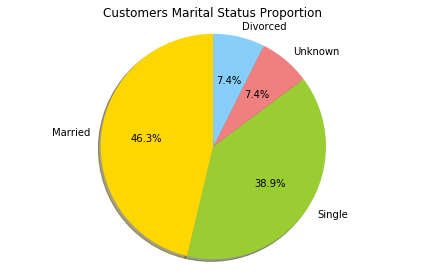

In [284]:
# Pie chart for marital status
fig3, ax3 = plt.subplots()
ax3.pie(mar_status, labels=mar_status.index, colors = colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Customers Marital Status Proportion')
ax3.axis('equal')
plt.tight_layout()
plt.show();

In [285]:
#Income Category
income_category = data["Income_Category"].value_counts()
print(income_category)

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64


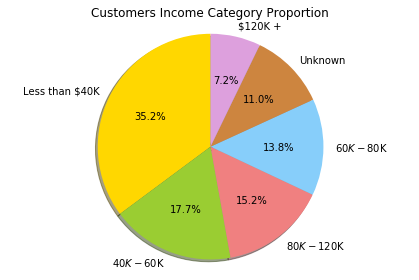

In [320]:
# Pie chart with income category
fig, ax1 = plt.subplots()
ax1.pie(income_category, labels=income_category.index, colors = colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Customers Income Category Proportion')
ax1.axis('equal')
plt.tight_layout()
plt.show();

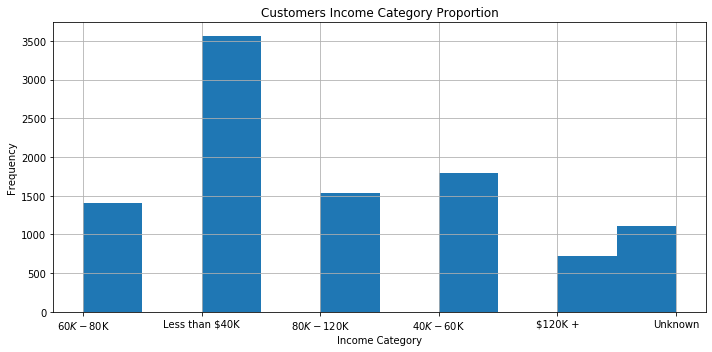

In [329]:
# Histogram of Income of Clients
plt.figure(figsize=(10, 5))
data["Income_Category"].hist()
plt.title('Customers Income Category Proportion')
plt.xlabel('Income Category')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show();

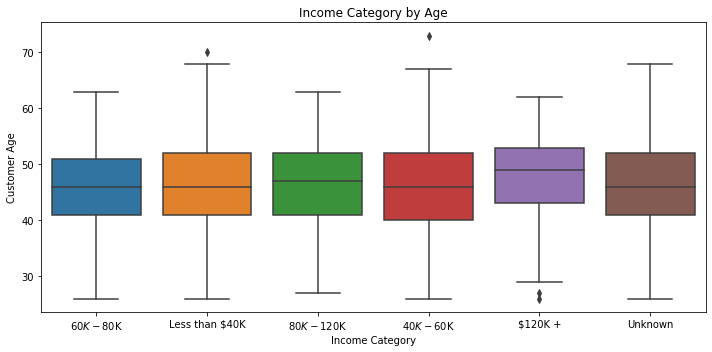

In [303]:
#Boxplot of Income by Age
fig1, ax1 = plt.subplots(figsize=(10, 5))
sns.boxplot(y = "Customer_Age", x = "Income_Category", data = data)
plt.title('Income Category by Age')
plt.xlabel('Income Category')
plt.ylabel('Customer Age')
plt.tight_layout()
plt.show();

In [287]:
#Card Category
card_category = data["Card_Category"].value_counts()
print(card_category)

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64


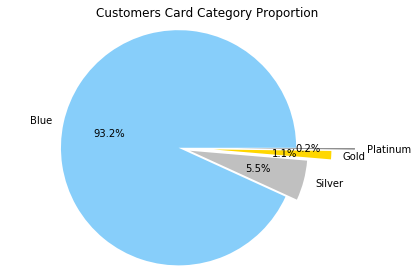

In [307]:
# Pie chart of Card Categories
fig, ax1= plt.subplots()
col = ['lightskyblue','silver','gold','gray']
ax1.pie(card_category, labels=card_category.index, autopct='%1.1f%%', colors = col, explode=(0,0.1,.3,.5),startangle=0)
plt.title('Customers Card Category Proportion')
ax1.axis('equal')
plt.tight_layout()
plt.show();

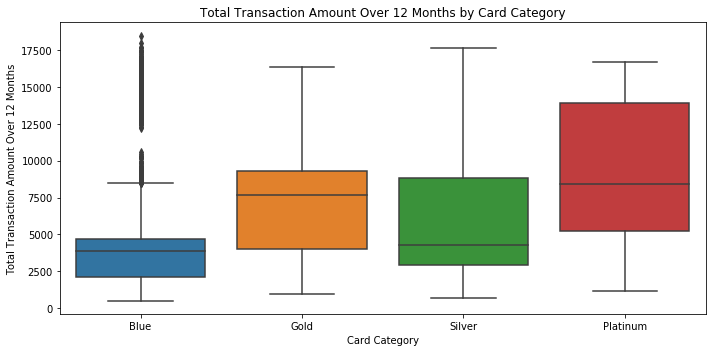

In [305]:
# Boxplot of Total Transaction Amount by Card Category
fig1, ax1 = plt.subplots(figsize=(10, 5))
sns.boxplot(y = "Total_Trans_Amt", x = "Card_Category", data = data)
plt.title('Total Transaction Amount Over 12 Months by Card Category')
plt.xlabel('Card Category')
plt.ylabel('Total Transaction Amount Over 12 Months')
plt.tight_layout()
plt.show();

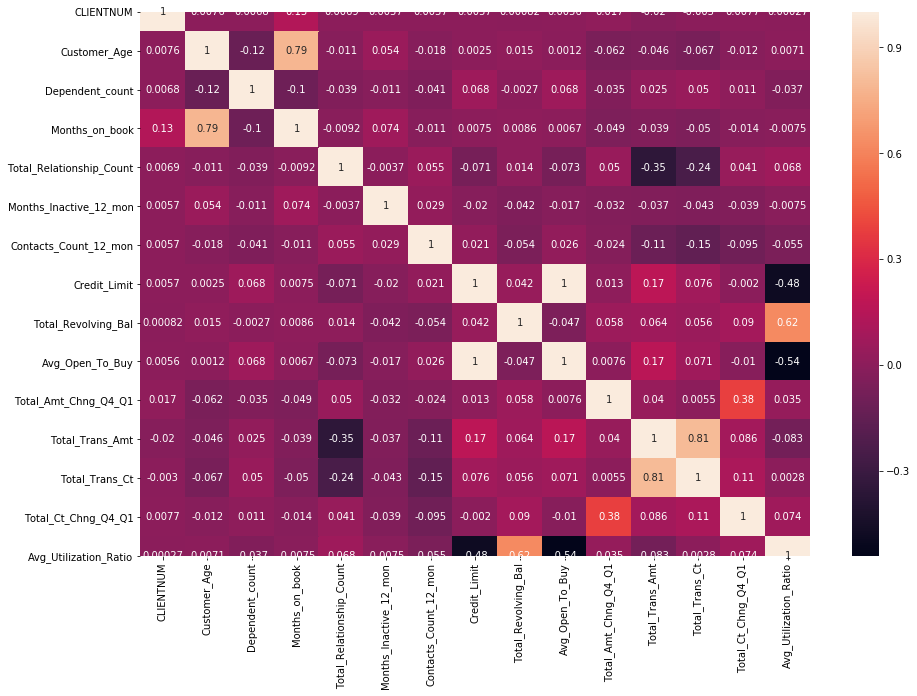

In [289]:
#correlation
# heat map
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True)
plt.show()

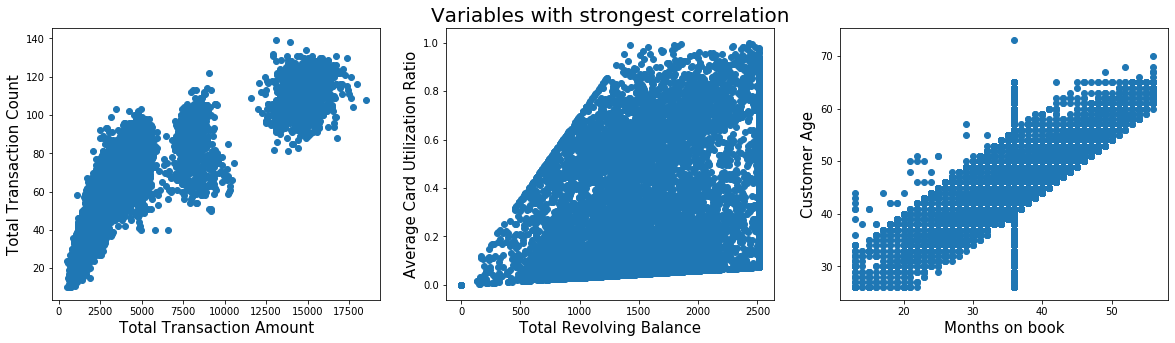

In [290]:
#plot variable with highest correlation 
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))

ax1.scatter(data['Total_Trans_Amt'], data['Total_Trans_Ct'])
ax1.set_xlabel('Total Transaction Amount', fontsize=15)
ax1.set_ylabel('Total Transaction Count', fontsize=15)

ax2.scatter(data['Total_Revolving_Bal'], data['Avg_Utilization_Ratio'])
ax2.set_xlabel('Total Revolving Balance', fontsize=15)
ax2.set_ylabel('Average Card Utilization Ratio', fontsize=15)

ax3.scatter(data['Months_on_book'], data['Customer_Age'])
ax3.set_xlabel('Months on book', fontsize=15)
ax3.set_ylabel('Customer Age', fontsize=15)

ax2.set_title('Variables with strongest correlation', fontsize=20)
plt.show()

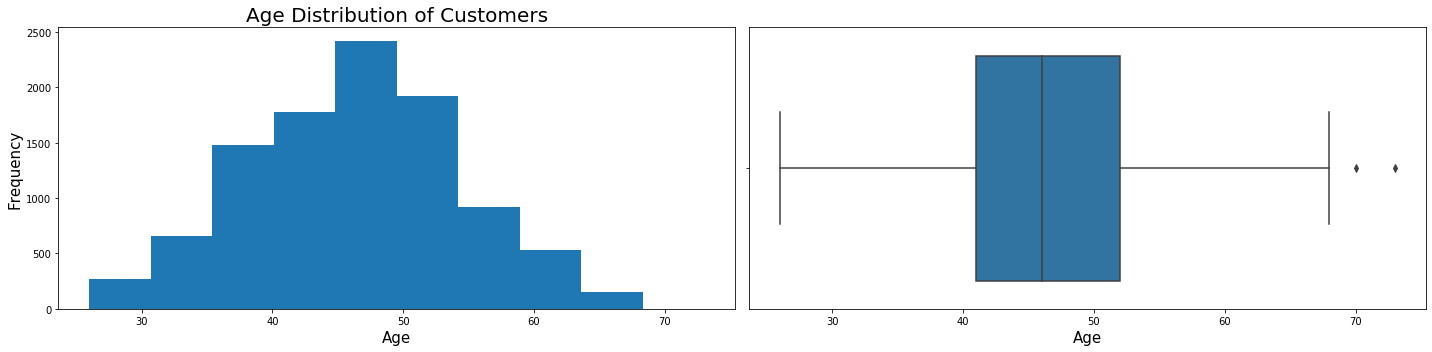

In [291]:
#Age histogram
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
ax1.hist(data['Customer_Age'])
ax1.set_xlabel('Age', fontsize=15)
ax1.set_ylabel('Frequency', fontsize=15)
#normally distributed

# Age boxplot
sns.boxplot(data['Customer_Age'])
ax2.set_xlabel('Age', fontsize=15)
ax1.set_title('Age Distribution of Customers', fontsize=20)
plt.tight_layout()
plt.show()

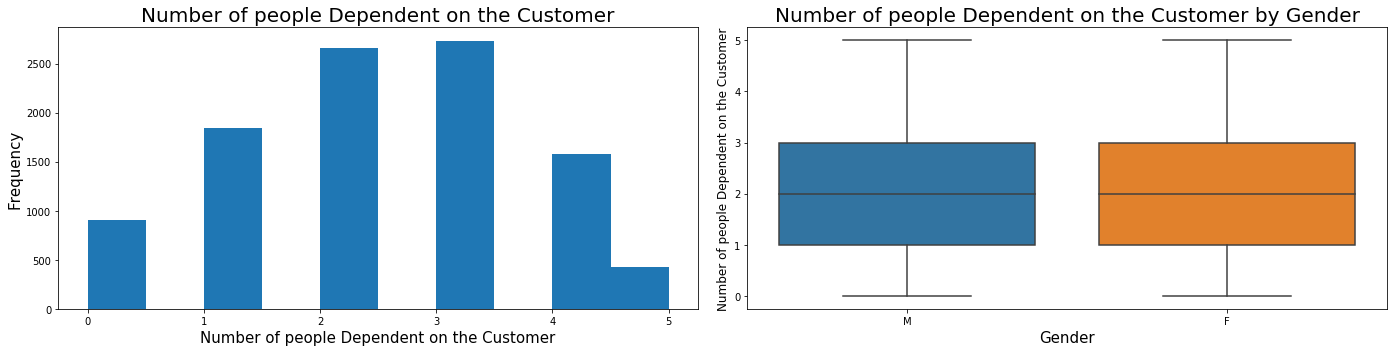

In [292]:
#Dependent count histogram
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
ax1.hist(data['Dependent_count'])
ax1.set_xlabel('Number of people Dependent on the Customer', fontsize=15)
ax1.set_ylabel('Frequency', fontsize=15)
ax1.set_title('Number of people Dependent on the Customer', fontsize=20)
#normally distributed

# Dependent count by gender boxplot
sns.boxplot(y = "Dependent_count", x = "Gender", data = data)
ax2.set_title('Number of people Dependent on the Customer by Gender', fontsize=20)
ax2.set_ylabel('Number of people Dependent on the Customer', fontsize=12)
ax2.set_xlabel('Gender', fontsize=15)
plt.tight_layout()
plt.show()